# **Data Analysis in Professional Basketball**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1:-Managing-data-files" data-toc-modified-id="Question-1:-Managing-data-files-1">Question 1: Managing data files</a></span><ul class="toc-item"><li><span><a href="#Question-1a:-Team-Data" data-toc-modified-id="Question-1a:-Team-Data-1.1">Question 1a: Team Data</a></span></li><li><span><a href="#Question-1b:-Player-Data" data-toc-modified-id="Question-1b:-Player-Data-1.2">Question 1b: Player Data</a></span></li><li><span><a href="#Question-1c:-Shots-Data" data-toc-modified-id="Question-1c:-Shots-Data-1.3">Question 1c: Shots Data</a></span></li><li><span><a href="#Question-1d:-Extract-Stephen-Curry's-Shot-Data" data-toc-modified-id="Question-1d:-Extract-Stephen-Curry's-Shot-Data-1.4">Question 1d: Extract Stephen Curry's Shot Data</a></span></li></ul></li><li><span><a href="#Question-2:-Visualization" data-toc-modified-id="Question-2:-Visualization-2">Question 2: Visualization</a></span><ul class="toc-item"><li><span><a href="#Question-2a:-All-Shots-Scatter-Plot" data-toc-modified-id="Question-2a:-All-Shots-Scatter-Plot-2.1">Question 2a: All Shots Scatter Plot</a></span></li><li><span><a href="#Question-2b:-All-Shots-Scatter-Plot-+-Court-Outline" data-toc-modified-id="Question-2b:-All-Shots-Scatter-Plot-+-Court-Outline-2.2">Question 2b: All Shots Scatter Plot + Court Outline</a></span></li><li><span><a href="#Question-2c:-Analyzing-the-Visualization" data-toc-modified-id="Question-2c:-Analyzing-the-Visualization-2.3">Question 2c: Analyzing the Visualization</a></span></li><li><span><a href="#Question-2d:-A-Hexbin-plot" data-toc-modified-id="Question-2d:-A-Hexbin-plot-2.4">Question 2d: A Hexbin plot</a></span></li></ul></li><li><span><a href="#Question-3:-Binning-and-Smoothing-Shots" data-toc-modified-id="Question-3:-Binning-and-Smoothing-Shots-3">Question 3: Binning and Smoothing Shots</a></span><ul class="toc-item"><li><span><a href="#Question-3a:-2D-Smoothing" data-toc-modified-id="Question-3a:-2D-Smoothing-3.1">Question 3a: 2D Smoothing</a></span></li><li><span><a href="#Question-3b:-Visualize-the-binning-on-curry_data" data-toc-modified-id="Question-3b:-Visualize-the-binning-on-curry_data-3.2">Question 3b: Visualize the binning on <code>curry_data</code></a></span></li><li><span><a href="#Vectorize-Shot-Images" data-toc-modified-id="Vectorize-Shot-Images-3.3">Vectorize Shot Images</a></span></li></ul></li><li><span><a href="#Question-4:-Non-negative-Matrix-Factorization-(NMF)" data-toc-modified-id="Question-4:-Non-negative-Matrix-Factorization-(NMF)-4">Question 4: Non-negative Matrix Factorization (NMF)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-data-matrix-$X$" data-toc-modified-id="The-data-matrix-$X$-4.0.1">The data matrix $X$</a></span></li><li><span><a href="#Bases-matrix:-$W$" data-toc-modified-id="Bases-matrix:-$W$-4.0.2">Bases matrix: $W$</a></span></li><li><span><a href="#Coefficient-matrix:-H" data-toc-modified-id="Coefficient-matrix:-H-4.0.3">Coefficient matrix: H</a></span></li></ul></li><li><span><a href="#Question-4a:-Computing-NMF-Factorization" data-toc-modified-id="Question-4a:-Computing-NMF-Factorization-4.1">Question 4a: Computing NMF Factorization</a></span></li><li><span><a href="#Question-4b:-Visualizing-Shot-Types" data-toc-modified-id="Question-4b:-Visualizing-Shot-Types-4.2">Question 4b: Visualizing Shot Types</a></span></li><li><span><a href="#Question-4c:-Reconstruction-Error" data-toc-modified-id="Question-4c:-Reconstruction-Error-4.3">Question 4c: Reconstruction Error</a></span></li><li><span><a href="#Question-4d:-Choice-of-Colormap" data-toc-modified-id="Question-4d:-Choice-of-Colormap-4.4">Question 4d: Choice of Colormap</a></span></li><li><span><a href="#Question-4e:-More-Detailed-Modeling" data-toc-modified-id="Question-4e:-More-Detailed-Modeling-4.5">Question 4e: More Detailed Modeling</a></span></li><li><span><a href="#Question-4f:-Comparing-Players" data-toc-modified-id="Question-4f:-Comparing-Players-4.6">Question 4f: Comparing Players</a></span></li><li><span><a href="#Question-4g:-Residuals" data-toc-modified-id="Question-4g:-Residuals-4.7">Question 4g: Residuals</a></span></li><li><span><a href="#Question-4h:-Proposing-improvements" data-toc-modified-id="Question-4h:-Proposing-improvements-4.8">Question 4h: Proposing improvements</a></span></li></ul></li></ul></div>

# Assignment 3: Exploratory Data Analysis in Professional Basketball

In this assignment we'll conduct an exploratory data analysis of professional basketball data.  Basketball is a team sport in which the goal is to try to outscore the amount in a fixed amount of time. Points are scored (either 2 or 3 points) by putting the ball throw a hoop on one end of the court.  An attempt at putting the ball throw the hoop is known as a "shot".  If helpful, you can read more about [the rules of basketball](https://en.wikipedia.org/wiki/Rules_of_basketball).

The National Basketball Association (NBA) is the professional basketball league in the United States and provides a nice website with many statistics gathered on teams and players in the league: [http://stat.nba.com](http://stat.nba.com). 

## Question 1: Managing data files

We will use data that is available from NBA. Although NBA doesn't officially make the data API (application programming interface) public, people have figured out ways to access their data programmatically ([1](https://datavizardry.com/2020/01/28/nba-shot-charts-part-1/), [2](https://github.com/swar/nba_api), [3](https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation)). While these approaches will work when python is installed and running on your computer, NBA seems to block (pun intended) connections from Google Cloud where our course JupyterHub is running.

Therefore, in this assignment, the raw data downloads are provided to you in a zip file: https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip

Download and unzip the file to a directory named `data` using command line commands (unzipping on Windows and Mac may not work because different OS have different constraints on filename lengths, etc.). Adding exclamation point in Jupyter notebook cell indicates that `bash` shell interpreter will execute your command.
```bash
wget -nc https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip -O nba-data.zip
unzip -o nba-data.zip -d data
```
What these commands are doing:
* `wget` downloads files ([what do each of the pieces do?](https://explainshell.com/explain?cmd=wget+-nc+https%3A%2F%2Fucsb.box.com%2Fshared%2Fstatic%2F940qiuxyp798gv4nx8iwvazu9qqjs37e.zip+-O+nba-data.zip))
* `unzip` will unzip `nba-data.zip` into directory named `data` (specified by `-d data`) and will overwrite any same filenames when extracting (specified by `-o`).
Following screencast videos show the terminal vs. Jupyter notebook's `!` exclamation way of running command line commands.

In [ ]:
%%HTML
<table>
    <tr>
    <td><div align="middle">
    <video width="80%" controls>
          <source src="media/cli-part-1.mp4" type="video/mp4">
    </video></div></td>
    </tr>
    <tr>
    <td><div align="middle">
    <video width="80%" controls>
          <source src="media/cli-part-2.mp4" type="video/mp4">
    </video></div></td>
    </tr>
</table>

""
""


In [ ]:
!wget -nc https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip -O nba-data.zip
!unzip -o nba-data.zip -d data

--2022-11-22 04:51:05--  https://ucsb.box.com/shared/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip
Resolving ucsb.box.com (ucsb.box.com)... 74.112.186.144
Connecting to ucsb.box.com (ucsb.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip [following]
--2022-11-22 04:51:05--  https://ucsb.box.com/public/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip
Reusing existing connection to ucsb.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ucsb.app.box.com/public/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip [following]
--2022-11-22 04:51:05--  https://ucsb.app.box.com/public/static/z6y3etgikbzbnf0ld4brvc95xtgjcrie.zip
Resolving ucsb.app.box.com (ucsb.app.box.com)... 74.112.186.144
Connecting to ucsb.app.box.com (ucsb.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxcloud

After unzipping the files, you will find three types of files in `data/` directory:

* Team data: `commonTeamYears?LeagueID=00&Season=2018-19`
* Player data: `commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0`
* Player's shot data: `shotchartdetail?PlayerID=[PlayerID]&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&`

Each player's shot data is identified by replacing `[PlayerID]` with their numeric ID.

Here is how we will read in the data:
* Each data file contains text in [JSON (Javascript Object Notation) format](https://www.w3schools.com/python/python_json.asp).
* First, read the data content as text (using [Path.read_text()](https://docs.python.org/3/library/pathlib.html#pathlib.Path.read_text) from `pathlib` module)
* Second, we convert it to a Python dictionary format (using [json.loads()](https://docs.python.org/3/library/json.html#json.loads) in `json` module)
* Third, identify DataFrame content 
* Fourth, identify DataFrame header
* Fifth, assemble DataFrame

Another way to unzip a file is using `zipfile`.

In [ ]:
import zipfile
with zipfile.ZipFile('nba-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

### Question 1a: Team Data

Read team data file into a pandas data frame named `allteams` starting from the given code below.

In [ ]:
from pathlib import Path
import json
import pandas as pd
import numpy as np

fname  = 'data/commonTeamYears?LeagueID=00&Season=2018-19' # directory_name/file_name
step_1 = Path(fname).read_text()              # str  read the data content as text
step_2 = json.loads(step_1)                   # dict convert it to a Python dictionary format 
step_3 = step_2['resultSets'][0]['rowSet']    # list identify DataFrame content
step_4 = step_2['resultSets'][0]['headers']   # list identify DataFrame header

In [ ]:
# print out each of step_1 through step_4 and understand what each line does
print('Step1 :',step_1) 
print('Step2 :',step_2)
print('Step3 :',step_3)
print('Step4 :',step_4)

Step1 : {"resource":"commonteamyears","parameters":{"LeagueID":"00"},"resultSets":[{"name":"TeamYears","headers":["LEAGUE_ID","TEAM_ID","MIN_YEAR","MAX_YEAR","ABBREVIATION"],"rowSet":[["00",1610612737,"1949","2019","ATL"],["00",1610612738,"1946","2019","BOS"],["00",1610612740,"2002","2019","NOP"],["00",1610612741,"1966","2019","CHI"],["00",1610612742,"1980","2019","DAL"],["00",1610612743,"1976","2019","DEN"],["00",1610612745,"1967","2019","HOU"],["00",1610612746,"1970","2019","LAC"],["00",1610612747,"1948","2019","LAL"],["00",1610612748,"1988","2019","MIA"],["00",1610612749,"1968","2019","MIL"],["00",1610612750,"1989","2019","MIN"],["00",1610612751,"1976","2019","BKN"],["00",1610612752,"1946","2019","NYK"],["00",1610612753,"1989","2019","ORL"],["00",1610612754,"1976","2019","IND"],["00",1610612755,"1949","2019","PHI"],["00",1610612756,"1968","2019","PHX"],["00",1610612757,"1970","2019","POR"],["00",1610612758,"1948","2019","SAC"],["00",1610612759,"1976","2019","SAS"],["00",1610612760,"

Use variables constructed above to assemble `allteams` DataFrame.

Drop any teams that no longer exist as of 2019. These teams show None in `ABBREVIATION` column.

<!--
BEGIN QUESTION
name: q1a
manual: false
points: 3
-->

In [ ]:
# Assemble step 3 & 4 into a Dataframe called allteams
# Drop any teams that no longer exist as of 2019.These teams show None in ABBREVIATION column
allteams = pd.DataFrame(step_3, columns= step_4).astype({'ABBREVIATION':'str'}).reindex()
allteams = allteams.loc[allteams['ABBREVIATION']!='None']

In [ ]:
#allteams.loc[allteams['ABBREVIATION']!='None']

### Question 1b: Player Data

`pathlib` has flexible ways to specify file and directory paths. For example, the following are equivalent:

* `Path('data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')`
* `Path('data') / 'commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')`
* `Path('data').joinpath('commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')`

Read players data file with name `data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0`. 
Assemble pandas DataFrame with name `allplayers`. Set row index to be `PERSON_ID` and `sort_index`.

<!--
BEGIN QUESTION
name: q1b
manual: false
points: 3
-->

In [ ]:
dirname  = 'data' # directory_name
filename = 'commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0' # file_name
step_1 = Path('data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0').read_text()
step_2 =json.loads(step_1) 
step_3 = step_2['resultSets'][0]['rowSet']    # list identify DataFrame content
step_4 = step_2['resultSets'][0]['headers']   #column headers


allplayers = pd.DataFrame(step_3, columns= step_4).set_index('PERSON_ID').sort_index()


### Question 1c: Shots Data

`pathlib` can also find all filenames that match a given pattern using [`Path.glob()` method](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob).

For example, teams data and players data start with the pattern `common` followed by a wildcard `*`: `common*`. 

We can use this to retrieve two file names with one call:

In [ ]:
two_files = Path('data').glob('common*') # generator: https://www.educative.io/edpresso/generator-vs-iterator-in-python
list(two_files)                          # list

[PosixPath('data/commonTeamYears?LeagueID=00&Season=2018-19'),
 PosixPath('data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0')]

All file names for shots data start with `shotchartdetail`. 

Use this as the pattern to 
* First, read all file names into `allshots_files`
* Second, loop over each file in `allshots_files` and assemble a dataframe
* Third, add as an element in a list named `allshots_list` (each file is an data frame item in the list). 
* Fourth, concatenate all dataframes into one dataframe named `allshots`. Set the row index to be `PLAYER_ID` and `sort_index`.

<!--
BEGIN QUESTION
name: q1c
manual: false
points: 4
-->

In [ ]:
allshots_files = list(Path('data').glob('shotchartdetail*'))
allshots_files.sort()
allshots_list  = list()

for f in allshots_files:
    step_1 = f.read_text()
    step_2 =json.loads(step_1 ) 
    step_3 = step_2['resultSets'][0]['rowSet']
    step_4 = step_2['resultSets'][0]['headers']
    df = pd.DataFrame(step_3, columns= step_4)
    allshots_list.append(df)
   
 
allshots = pd.concat(allshots_list).set_index('PLAYER_ID').sort_index()


Question 1d: Extract Stephen Curry's Shot Data

Use [`allplayers.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to find the player id (index) associated with the player named "[Stephen Curry](https://en.wikipedia.org/wiki/Stephen_Curry)".  Set the value of `PlayerID` as `curry_id` of type `str`. 

Subset all of Stephen Curry's shots in a data frame named `curry_data`. Also, set the dtype of `SHOT_MADE_FLAG` to `'bool'` in one command. Something like:  
```
curry_data = allshots.query(???).astype(????)
```

<!--
BEGIN QUESTION
name: q1d
manual: false
points: 6
-->

In [ ]:
# fill-in all ...
query_str = 'DISPLAY_FIRST_LAST == "Stephen Curry"'
curry_id = str(allplayers.query(query_str).index.values[0])
curry_data = allshots.query('PLAYER_ID == ' + curry_id).astype({'SHOT_MADE_FLAG' : 'bool'})
curry_data

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
201939,Shot Chart Detail,0021800862,117,Stephen Curry,1610612744,Golden State Warriors,1,3,55,Made Shot,...,Center(C),16-24 ft.,17,2,172,1,True,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,600,Stephen Curry,1610612744,Golden State Warriors,4,5,9,Missed Shot,...,Right Side Center(RC),24+ ft.,26,116,239,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,576,Stephen Curry,1610612744,Golden State Warriors,4,6,55,Missed Shot,...,Right Side(R),24+ ft.,22,225,28,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,484,Stephen Curry,1610612744,Golden State Warriors,3,2,24,Missed Shot,...,Left Side(L),24+ ft.,23,-235,8,1,False,20190213,POR,GSW
201939,Shot Chart Detail,0021800862,467,Stephen Curry,1610612744,Golden State Warriors,3,3,3,Missed Shot,...,Right Side(R),16-24 ft.,22,193,109,1,False,20190213,POR,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201939,Shot Chart Detail,0021800494,563,Stephen Curry,1610612744,Golden State Warriors,4,10,50,Missed Shot,...,Right Side Center(RC),24+ ft.,26,175,195,1,False,20181223,GSW,LAC
201939,Shot Chart Detail,0021800494,510,Stephen Curry,1610612744,Golden State Warriors,3,2,25,Missed Shot,...,Left Side Center(LC),24+ ft.,25,-163,195,1,False,20181223,GSW,LAC
201939,Shot Chart Detail,0021800494,467,Stephen Curry,1610612744,Golden State Warriors,3,5,33,Missed Shot,...,Center(C),Less Than 8 ft.,7,-3,75,1,False,20181223,GSW,LAC


## Question 2: Visualization

### Question 2a: All Shots Scatter Plot
Use `seaborn` to create scatter plot of the location of Stephen Curry's shot attempts from this year (`LOC_X` and `LOC_Y`).  When you call a scatterplot, seaborn returns a figure in an object, we'll call it `ax`.  We can set properties of the figure by calling methods on `ax`.  Use this approach to set the x-axis limits to span (-300, 300), the y-axis limits to span (-100, 500).

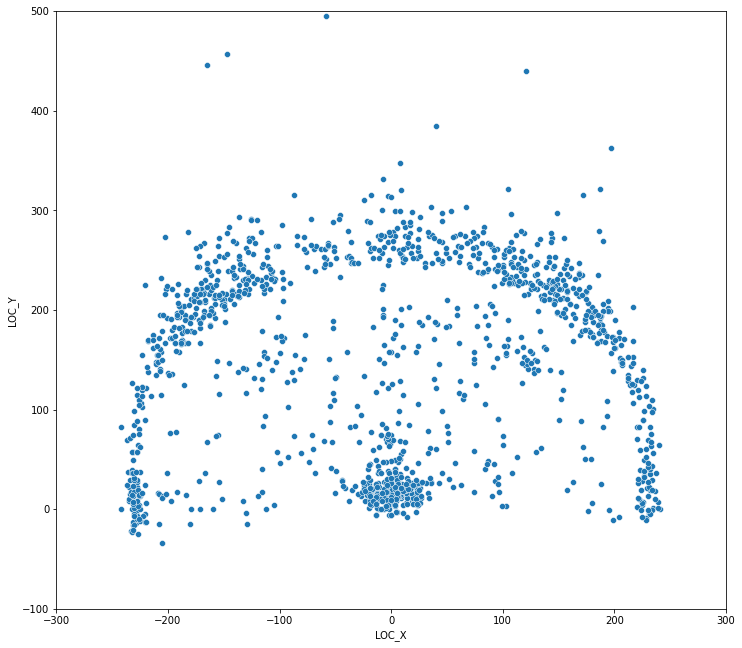

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12, 11])
ax2a = sns.scatterplot(x="LOC_X", y="LOC_Y", data= curry_data)

# Set x/y limits and labels
ax2a.set_xlim(-300, 300)
ax2a.set_ylim(-100, 500)
plt.show()

Understanding any dataset is difficult without context.  Lets add some important context by adding the relevant court lines into our diagram.  If you are interested, you can read more about the lines and dimensions on the [NBA basketball court](https://en.wikipedia.org/wiki/Basketball_court).  We will use code from [http://savvastjortjoglou.com/nba-shot-sharts.html](http://savvastjortjoglou.com/nba-shot-sharts.html) to add the court markings to our diagram.  The `draw_court` function below will do this for us.  The below cell will generate an example court.

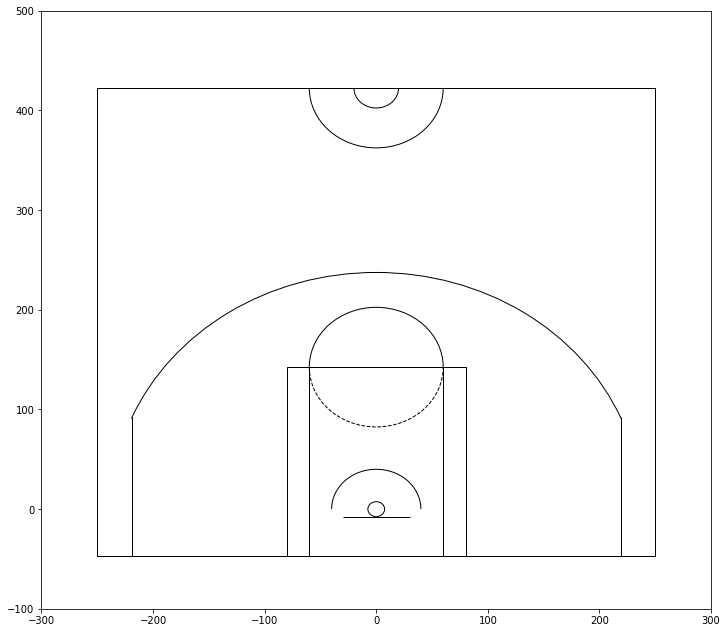

In [ ]:
## code is from http://savvastjortjoglou.com/nba-shot-sharts.html
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
    from matplotlib.patches import Circle, Rectangle, Arc
    from matplotlib.pyplot import gca
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

plt.scatter(made_shots.LOC_X, made_shots.LOC_Y)<!-- BEGIN QUESTION -->

### Question 2b: All Shots Scatter Plot + Court Outline

Again use seaborn to make a scatter plot of Stephen Curry's shots. Again, set the x-axis limits to span (-300, 300), the y-axis limits to span (-100, 500) color the points by whether the shot was made or missed.  Set the missed shots to have an 'x' symbol and made shots to be a circular symbol. Call the `draw_court` function with `outer_lines` set to to be true. Save the `Axes` returned by the plot call in a variable called `ax`.

<!--
BEGIN QUESTION
name: q2b1
manual: true
points: 4
-->

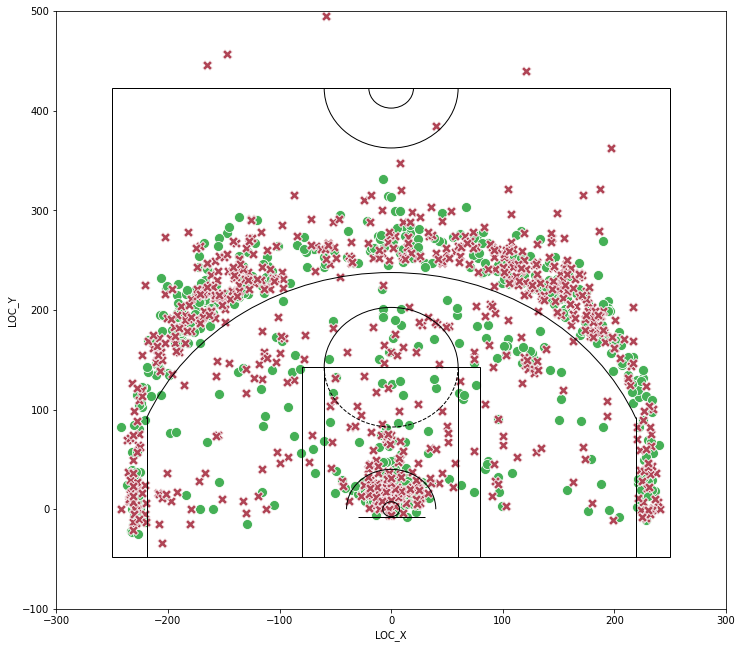

In [ ]:
plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
#ax = plt.scatter(curry_data.LOC_X, curry_data.LOC_Y)

ax = draw_court(outer_lines=True)

made_shots = curry_data.loc[curry_data.SHOT_MADE_FLAG == 1]
missed_shots = curry_data.loc[curry_data.SHOT_MADE_FLAG == 0]
markers = {0 : "X", 1 : "o"}
green = '#45B056'
red = '#B04556'
sns.scatterplot(data=curry_data, x=made_shots.LOC_X, y=made_shots.LOC_Y, s=100, color=green, marker = markers[1], ax =ax)
sns.scatterplot(data=curry_data, x=missed_shots.LOC_X, y=missed_shots.LOC_Y, s=100, color=red, marker = markers[0], ax =ax)

#Drawing Court

ax.set_xlim(-300,300)
ax.set_ylim(-100,500)
plt.show()




<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2c: Analyzing the Visualization
<!--
BEGIN QUESTION
name: q2c
manual: true
points: 4
-->

In a few sentences, discuss what makes this an effective or ineffective visualization for understanding the types of shots that Stephen Curry likes to take and is good at taking, relative to other players in the league.  Are there ways it can be improved?

In the above graph, the green indicates "a made shot" and red indicates "missed shot". The location of the NBA three-point line is evident by the many markers that form an arc in the scatter plot. And we can see that Curry's shot attempts are mainly done from the three point line relative to other location in the court. However, the graph could use more statistical input for us to understand Curry shot pattern comapred to other players. For instance, we can look at a heatmap of Curry shots vs. other players and understand how those compare to be able to make an inference about how Curry's performance, and shot pattern is. We could also use a histogram to look at the frequency of shots and what kind of distribution Curry's shot looks like. Therefore, the graph represents a somewhat good initial graph but overall is an ineffective visualization for understanding the types of shots that Stephen Curry likes to take or is good at taking relative to other players.                                                     

<!-- END QUESTION -->



### Question 2d: A Hexbin plot

Visualize Stephen Curry's shots by using a [hexbin plot with marginal histograms](https://seaborn.pydata.org/examples/hexbin_marginals.html). Also refer to setting [figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) for what commands below do.

In [ ]:
curry_data.reset_index()
data=curry_data.reset_index()

KeyboardInterrupt: ignored

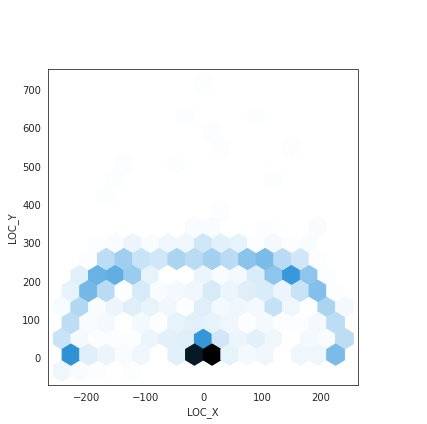

In [ ]:
sns.set_style("white")
joint_shot_chart = sns.jointplot(x="LOC_X", y="LOC_Y", data=curry_data,kind='hex', space=0)
joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, outer_lines=True)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-300, 300)
ax.set_ylim(500, -100)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Stephen Curry, 2018-19, FGA', 
             y=1.2, fontsize=10)

# Add Data Scource and Author
ax.text(-250,445,'\n This plot is based on code by Narjes Mathlouthi (source: http://stat.nba.com)',
        fontsize=12);

## Question 3: Binning and Smoothing Shots

So far, in we have worked with dataframes which represent each shot as a single observation (row) within the dataset.  However, this isn't a convenient data structure for the kinds of spatial analyses we will pursue below.

In this part, we will divide the court into square regions and create a matrix which includes the number of shots taken by a player in that region.  We divide the court up into square bins (i.e. a 2d histogram) and, for each player, count number of shots that fall into each bin. Fortunately, this function is relatively simple to write using `numpy` module. 

### Question 3a: 2D Smoothing

Fill in the `bin_shots` function below. Use `np.histgram2d` to count count the shots in each bin.  The bins are defined `bin_edges` which is a pandas Series of the form `(xedges, yedges)`.  If `density = True`, call `ndimage.filters.gaussian_filter` on the result of `np.histogram2d` with smoothing parameter `sigma`.  This will create a smoothed version of the raw data histograms.

<!--
BEGIN QUESTION
name: q3a
manual: false
points: 2
-->

In [ ]:
def bin_shots(df, bin_edges, density=False, sigma=1):
    
    """Given data frame of shots, compute a 2d matrix of binned counts is computed
    
    Args:
        df: data frame of shotchartdetail from nba.com. 
            At the minimum, variables named LOCX and LOCY are required.
        bin_edges: bin edge definition: edges in x and edges in y
    
    Returns:
        binned: counts
        xedges: bin edges in X direction
        yedges: bin edges in Y direction
    """
    import numpy as np
    from scipy import ndimage
    
    ## Call np.histogram2d
 
    binned, xedges, yedges = np.histogram2d(df['LOC_X'], df['LOC_Y'], bins = (bin_edges))
   
    if density:

        # Recompute 'binned' using "gaussian_filter"
        binned = binned = ndimage.filters.gaussian_filter(binned, sigma)
        
        # Normalize the histogram to be a "density", e.g. mass across all bins sums to 1.
        binned /= np.sum(binned)

    
    return(binned, xedges, yedges)


### Question 3b: Visualize the binning on `curry_data`

Call `bin_shots` on `curry_data` to create a binned but unsmoothed matrix of shot counts (call this `curry_binned_unsmoothed`), a binned and smoothed matrix of counts with `sigma=1` (call this `curry_binned_smoothed1`) and one with `sigma=5` (call this `curry_binned_smoothed5`). Use the bin edges defined below:

In [ ]:
## bin edge definitions in inches
xedges = np.linspace(start=-300, stop=300, num=151)
yedges = np.linspace(start=-48, stop=372, num=106)

In [ ]:
bin_edges = (xedges, yedges)

curry_binned_unsmoothed = bin_shots(curry_data, bin_edges, density=False,sigma=0) 
curry_binned_smoothed1= bin_shots(curry_data, bin_edges, density=False,sigma=1)  
curry_binned_smoothed5= bin_shots(curry_data, bin_edges, density=False,sigma=5) 
...

Ellipsis

The function below can be used to visualize the shots as a heatmap:

In [ ]:
def plot_shotchart(binned_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## number of x and y bins.  
    nx = xedges.size - 1
    ny = yedges.size - 1

    X, Y = np.meshgrid(xedges, yedges)
    
    if use_log:
        counts = np.log(binned_counts + 1)
        
    if ax is None:
        fig, ax = plt.subplots(1,1)
    
    ax.pcolormesh(X, Y, binned_counts.T, cmap=cmap) 
    ax.set_aspect('equal')
    
    draw_court(ax)
    
    return(ax)

Create 3 side by side plots of `curry_binned_unsmoothed`, `curry_binned_smoothed1` and `curry_binned_smoothed5`

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3b
manual: true
points: 5
-->

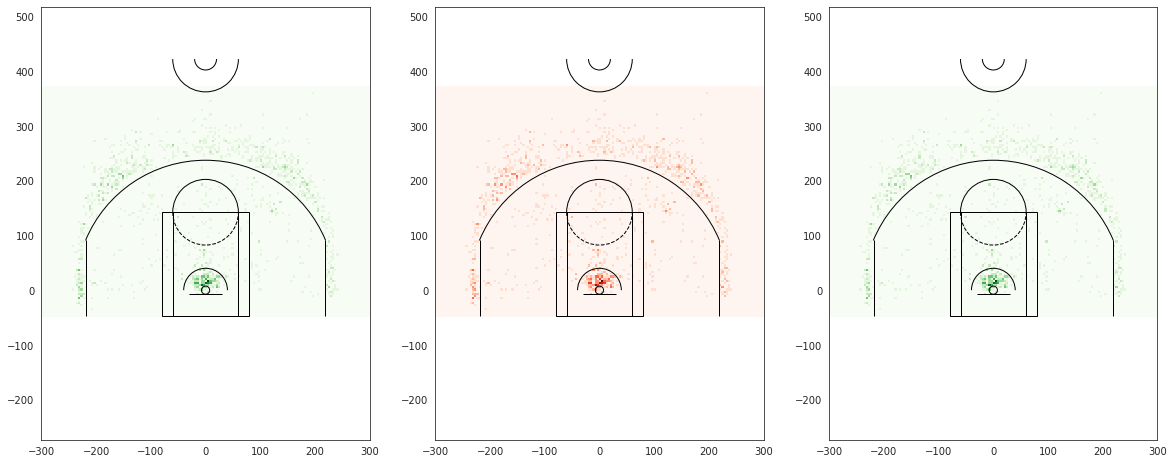

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,60))
plot_shotchart(curry_binned_unsmoothed[0], xedges, yedges, ax=ax[0],use_log=False, cmap = 'Greens')
plot_shotchart(curry_binned_smoothed1[0], xedges, yedges, ax=ax[1],use_log=False, cmap = 'Reds')
plot_shotchart(curry_binned_smoothed5[0], xedges, yedges, ax=ax[2], use_log=False, cmap = 'Greens')
fig.show()

<!-- END QUESTION -->



### Vectorize Shot Images

- Here we proceed create a dictionary of smoothed patterns, each vectorized into a 1-d array (like Lab 6)
- In this case, the object `all_smooth` is a dictionary that consists of arrays of length `15750`. 
- Each entry in `all_smooth` represents the smoothed frequency of shots along the bins generated in the code above for a given player.

In [ ]:
## number of bins is one less than number of edges (remember homework 1)
nx = xedges.size - 1
ny = yedges.size - 1

## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids = []

## 2d histogram containers for binned counts and smoothed binned counts

## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(allshots.groupby('PLAYER_ID')):
    
    ## what does this line do?
    pid, pdf = one
        
    num_shots = len(pdf.index)
    if(num_shots > 100): 
        
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
    
        ## vectorize and store into list
        all_smooth += [tmp1.reshape(-1)]
        all_counts += [tmp2.reshape(-1)]
        pids += [pid]
        
X = np.vstack(all_smooth).T
p, n = X.shape

print('Number of shot regions (p):', p)
print('Number of players (n):', n)

Number of shot regions (p): 15750
Number of players (n): 388


## Question 4: Non-negative Matrix Factorization (NMF) 

The non-negative matrix factorization is a dimension reduction technique that is often applied to image data.  It is similar to PCA except that is only applicable for strictly positive data.  We can apply the NMF to vectorized versions of the shot surface. This is useful because we can convert the observed matrix of shot surfaces into:
* Bases: Identifying modes of shooting style (number of modes is determined by `n_components` argument to `NMF` function below)
* Coefficients: How each players shooting style could be expressed as a (positive) linear combination of these bases

The NMF solves the following problem: given some matrix $X$ is $p\times n$ matrix, NMF computes the following factorization:
$$ \min_{W,H} \| X - WH \|_F\\
\text{ subject to } W\geq 0,\ H\geq 0, $$
where $W$ is ${p\times r}$ matrix and $H$ is ${r\times n}$ matrix.

In this homework, we have the following:
 
#### The data matrix $X$ 
$X$ is of dimension $n$={number of players} and $p$={number of total square bins on the court}. Each column corresponds to a player, with entries corresponding to a "flattened" or "vectorized" version of the 2d histograms plotted in part 4b.

#### Bases matrix: $W$

Columns $W_i$ contain the shot "bases". First, we will try it with $r=3$ bins in 5a, and then with $r=10$ bins in 5d.

#### Coefficient matrix: H

Each column of $H$ gives a coefficient for each of the bases vectors in $W$, and there are $n$ columns for each player.


The `sklearn` library is one of the main Python machine learning libraries.  It has a built in NMF function for us.  The function below runs this function and normalizes the basis surfaces to sum to 1.

In [ ]:
## Non-negative Matrix Factorization
def non_negative_marix_decomp(n_components, array_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, init='nndsvda', max_iter=500, random_state=0)
    W = model.fit_transform(array_data)
    
    # Normalize basis vectors to sum to 1
    Wsum = W.sum(axis=0)
    W = W/Wsum
    
    ## fix H correspondingly
    H = model.components_
    H = (H.T * Wsum).T

    nmf = (W, H)
    return(nmf)

### Question 4a: Computing NMF Factorization

Compute the NMF on all player's shot charts, X, assuming with `n_components` = 3 (i.e. each shot chart can be represented as a positive linear combination of 3 "basis" shot charts).  Fill in `plot_vectorized_shot_chart`.  This takes a the a vector of binned shot counts, converts it back to a matrix of the appropriate size and then calls `plot_shotchart` on the matrix.  The numpy function `reshape` will be useful here: [https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

<!--
BEGIN QUESTION
name: q4a
manual: false
points: 5
-->

In [ ]:
plot_vectorized_shot_chart = non_negative_marix_decomp(3, X)
W3 = plot_vectorized_shot_chart[0]
H3 = plot_vectorized_shot_chart[1]

<!-- BEGIN QUESTION -->

### Question 4b: Visualizing Shot Types

Plot the first three basis images by calling `plot_vectorized_shot_chart` below on the columns of `W3`.

<!--
BEGIN QUESTION
name: q4b
manual: true
points: 5
-->

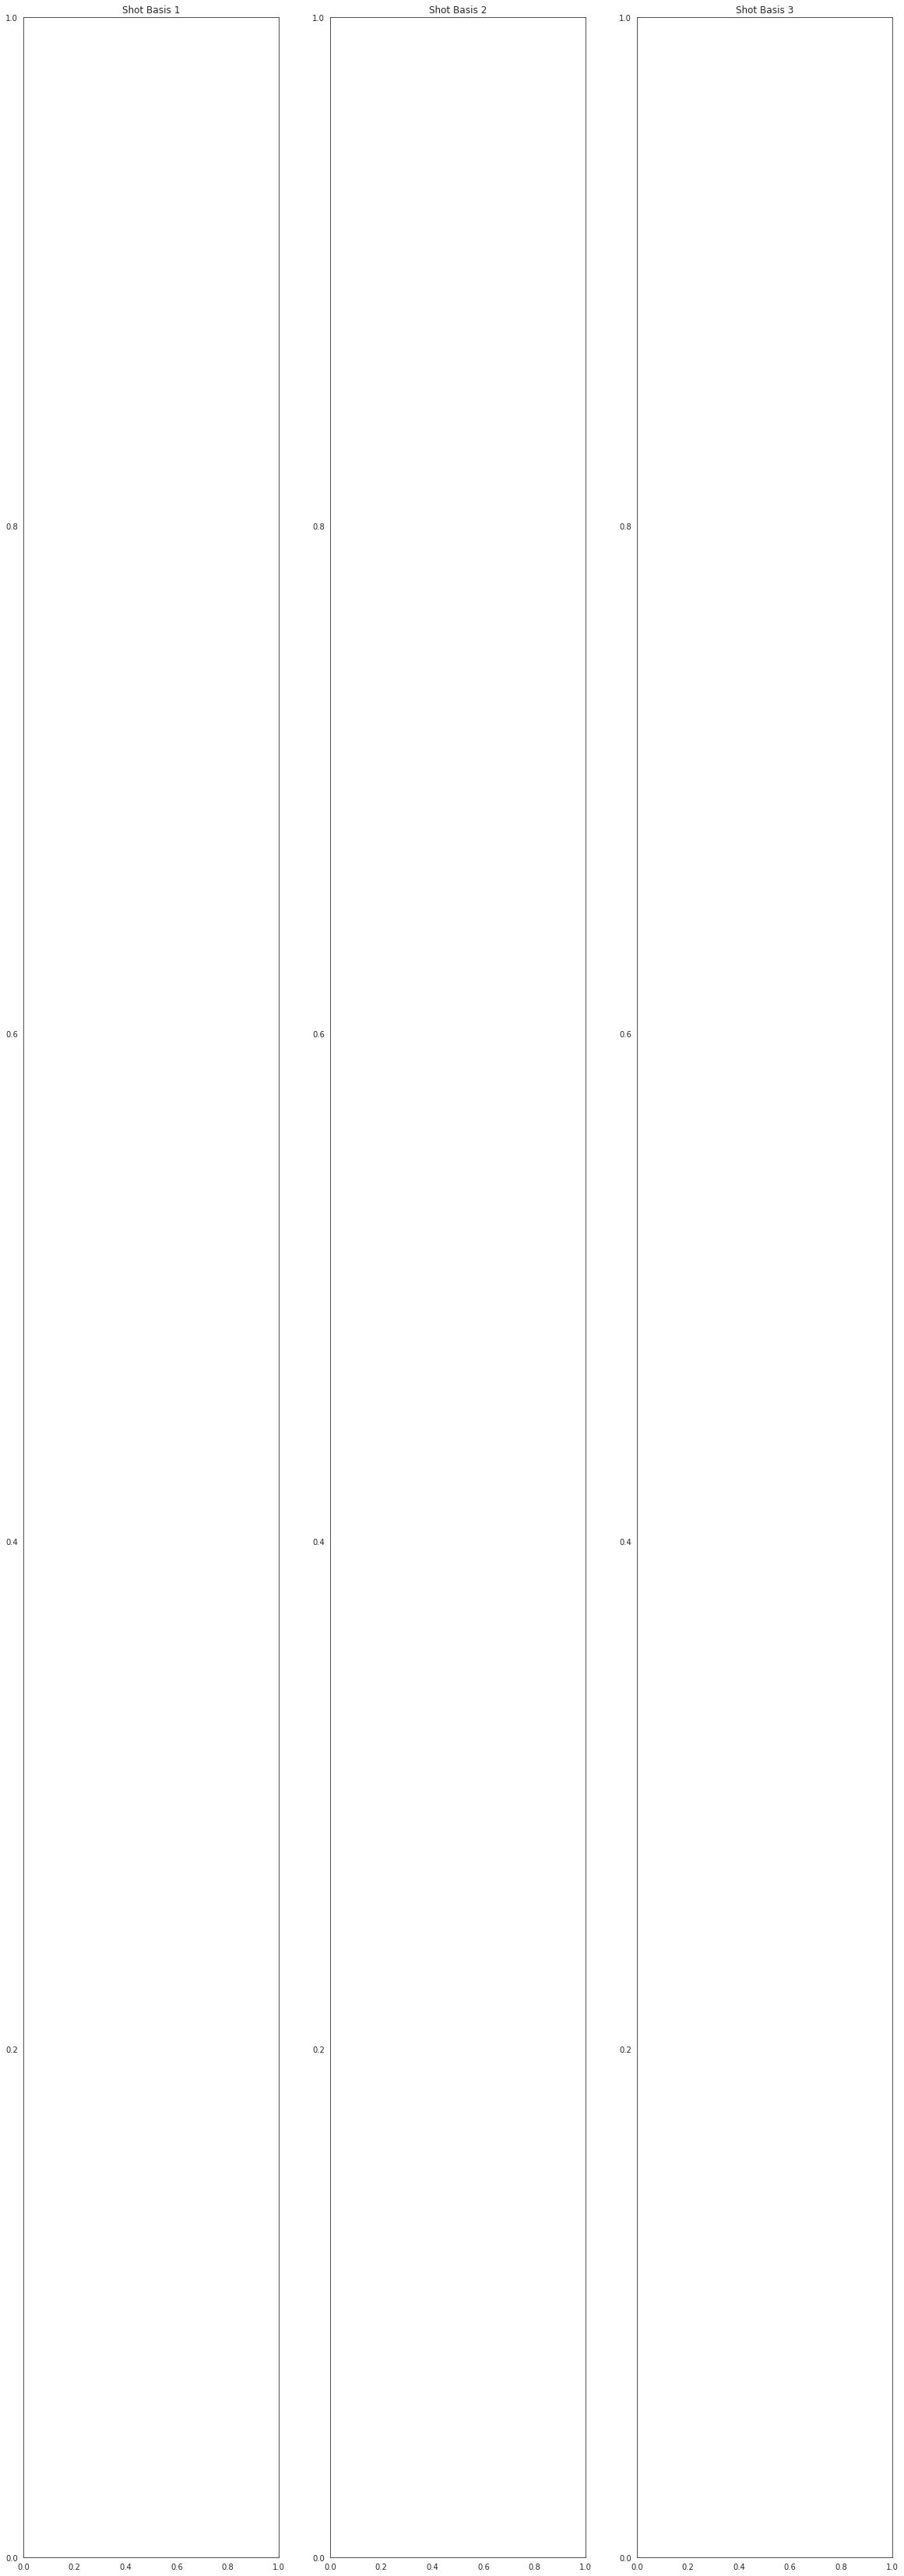

In [ ]:
def plot_vectorized_shotchart(vec_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """

    nx = xedges.size - 1
    ny = yedges.size - 1
    
    # use reshape to convert a vectorized counts back into a 2d histogram
    two_d_counts = np.reshape(vec_counts, (nx, ny))
    
    return(plot_shotchart(two_d_counts, xedges, yedges, ax=ax, use_log=use_log, cmap=cmap))

fig, ax = plt.subplots(1, 3, figsize=(20,60))

## Write a for loop
for i in range(3):
    # Call plot_vectorized_shot_chart
    ax[i].set_title('Shot Basis %i' % (i+1))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4c: Reconstruction Error

Below we re-construct the shooting pattern for a single player. By "reconstructing" we mean use the approximation $$\hat{X} = WH$$ obtained via NMF.  Find $\hat X$ by multipling W and H.  In python the `@` symbol is used for matrix multiplication.

<!--
BEGIN QUESTION
name: q4c
manual: true
points: 5
-->

In [ ]:
X3_hat = W3@H3

<!-- END QUESTION -->



Plot $X$, $\hat X$ and the residual ($X - \hat X$) for the player named LaMarcus Aldridge. Remember, each column of $X$ is a vectorized matrix corresponding to the binned (or smoothed binned) shot information.

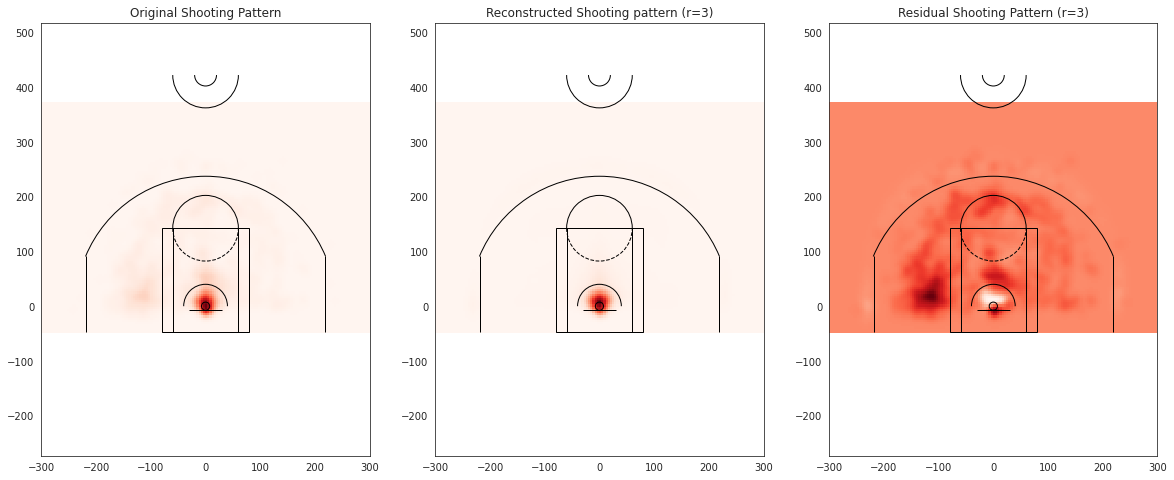

In [ ]:
# Find the player_id of LaMarcus Aldridge
player_id = allshots[allshots.PLAYER_NAME == 'LaMarcus Aldridge'].index[0]

## find index in X corresponding to that player
to_plot_idx = np.where(pids == player_id)[0][0]

fig, ax = plt.subplots(1, 3, figsize=(20,60))

## Call plot_vectorized_shot_chart
original_shotchart = plot_vectorized_shotchart(X[:,to_plot_idx],xedges,yedges,ax = ax[0])
reconstructed_shotchart = plot_vectorized_shotchart(X3_hat[:,to_plot_idx],xedges,yedges, ax = ax[1])
residual_chart = plot_vectorized_shotchart((X-X3_hat)[:, to_plot_idx],xedges,yedges,ax = ax[2])

# print(max(abs(X3_hat[:, to_plot_idx] - X[:, to_plot_idx])))
ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=3)')
ax[2].set_title('Residual Shooting Pattern (r=3)')
fig.show()

<!-- BEGIN QUESTION -->

### Question 4d: Choice of Colormap

Why does it make sense to use a _sequential_ palette for the original and reconstructed shot charts and a _diverging_ palette for the residual?  _Hint:_ Read the introduction to colormaps [here](https://matplotlib.org/users/colormaps.html). 


<!--
BEGIN QUESTION
name: q4d
manual: true
points: 3
-->

Sequential palettes are betteer for values that have ordering. Diverging palettes are better for values that have a critical value, like data that deviates around zero.

<!-- END QUESTION -->



What areas of the court does this player to shoot more and where less relative to the reconstructed area.  If its helpful, you can refer to court locations by name using this legend [here](https://en.wikipedia.org/wiki/Basketball_court#/media/File:Basketball_terms.png]).

The player tends to shoot the majority of his shots from the left side of the key. The player does not make many 3 point shots, he shoots almost all two points shots.

<!-- BEGIN QUESTION -->

### Question 4e: More Detailed Modeling

Re-run the analysis, this time for 10 basis vectors instead of 3.  Again plot the bases using `plot_vectorized_shotchart` on the columns of `W10`.

**Hint**: Study the following code
```
fig, ax = plt.subplots(2, 5, figsize=(20, 7))
ax = ax.flatten() # turn ax into a flat array
ax[0].set_title('hello')
ax[9].set_title('there')
fig.show()
```

<!--
BEGIN QUESTION
name: q4e1
manual: true
points: 3
-->

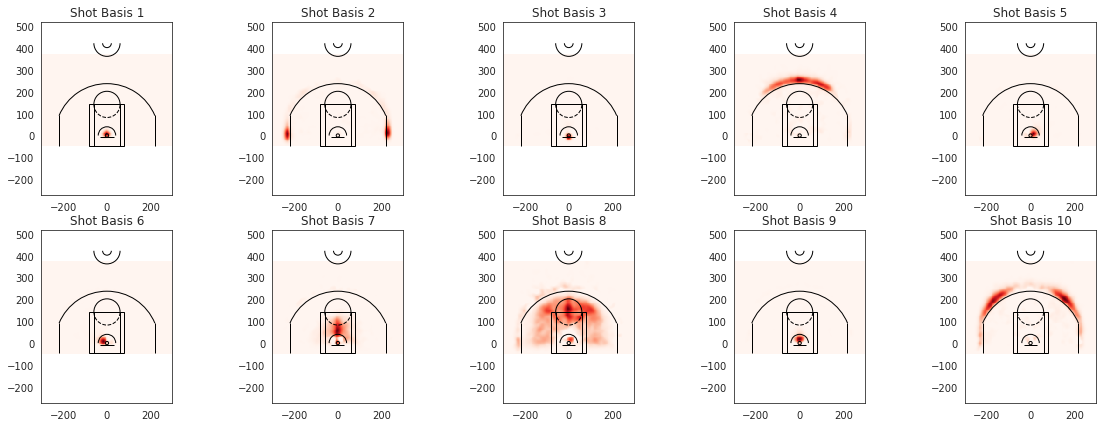

In [ ]:
plot_vectorized_shot_chart2 = non_negative_marix_decomp(10, X)
W10 = plot_vectorized_shot_chart2[0]
H10 = plot_vectorized_shot_chart2[1]

fig, ax = plt.subplots(2, 5, figsize=(20, 7))

## Write a for loop
for i in range(10):
    plot_vectorized_shotchart(W10[:,i], xedges, yedges, ax= ax[i//5, i % 5])
    ax[i//5, i % 5].set_title('Shot Basis %i' % (i+1))


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

If you did things correctly, you should be really impressed! We've identified potentially interesting patterns of shooting styles without actually specifying anything about the way basketball is played or where the relevant lines are on the court.  The resulting images are based only on the actual behavior of the players.  Even more impressive is that we're capturing similarity in regions that are far apart on the court.  One reason we can do this is that a basketball court is symmetric along the length of the court (i.e. symmetric about x=0).  However, people tend to be left or right hand dominant, which might affect their preferences.  Look carefuly at the shot basis plots above: is there any evidence of _asymmetry_ in player shooting behavior?  Refer to specific basis images in your answer.    


<!--
BEGIN QUESTION
name: q4e2
manual: true
points: 3
-->

From the above graph, we can detect asymmetry in players shooting behavior. For instance, in shot basis 8, the player tends to shoot more from the right side of the court than the left, whereas in shot basis 5 the player tends to shoot more from the right side of the basketball hoop. Lastly, in shot basis 6 the player seem to be shooting more from the left side of the basketball hoop.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Repeat part 5b, and again plot original, reconstructed and residual shot chats for LaMarcus Aldridge.

<!--
BEGIN QUESTION
name: q4e3
manual: true
points: 3
-->

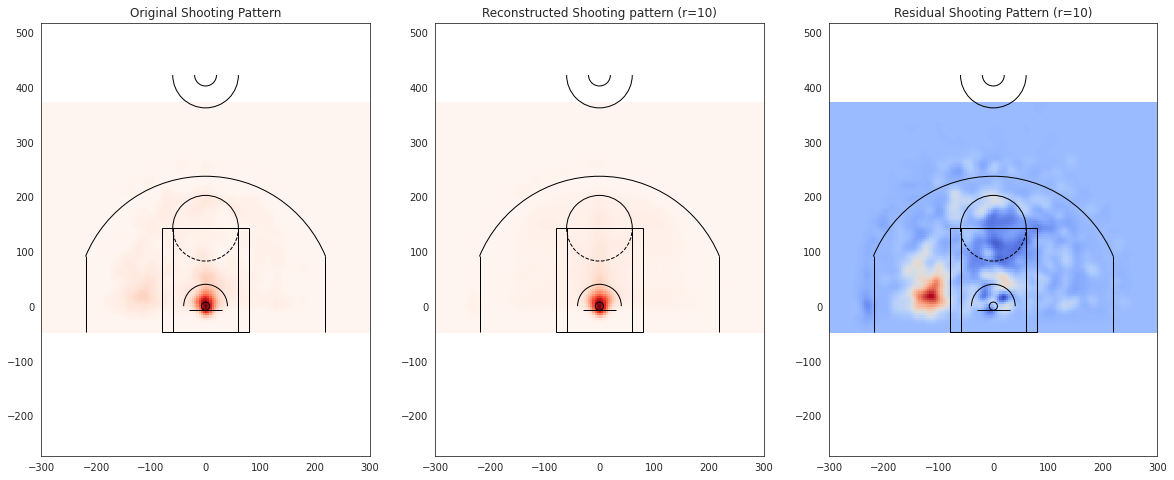

In [ ]:
X10_hat = (W10@H10)

fig, ax = plt.subplots(1, 3, figsize=(20,60))

# I took the first player appearing in first column 
# (you probably want to do more interesting players)
original_shotchart = plot_vectorized_shotchart(X[:,to_plot_idx], xedges,yedges, ax=ax[0])
reconstructed_shotchart = plot_vectorized_shotchart(X10_hat[:,to_plot_idx],xedges, yedges, ax=ax[1])
residual_chart = plot_vectorized_shotchart((X-X10_hat)[:, to_plot_idx], xedges,yedges, ax=ax[2], cmap='coolwarm')

ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=10)')
ax[2].set_title('Residual Shooting Pattern (r=10)');

In [ ]:
H10 = plot_vectorized_shot_chart2[1]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4f: Comparing Players 

With `H10` matrix, it is possible to compare any pair of players. For all players pairwise, $i$ and $j$, compare using euclidean distance between their coefficients:

$$ \text{player-distance}(i,j) = \| H_i - H_j \|_2 = \left(\sum_{k=1}^{10} (H_{ki} - H_{kj})^2 \right)^{1/2} $$

Create a heatmap for comparing pair-wise player distance matrix. Find the two pairs of players with smallest distances. Also, find two pairs of players with largest distances.

<!--
BEGIN QUESTION
name: q4f
manual: true
points: 10
-->

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
import seaborn as sns
import sklearn


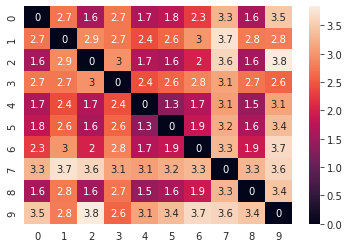

In [ ]:
pairwise = sklearn.metrics.pairwise.pairwise_distances(H10)
sns.heatmap(pairwise, annot=True)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4g: Residuals

The residual betwene `Xhat` and `X` gives a sense of how well a player is decribed by NMF computed matrices `W` and `H`. Calculate RMSE for each player, and plot the histogram. Comment on this distribution and players with smallest and largest RMSEs (use 10 components).

<!--
BEGIN QUESTION
name: q4g
manual: true
points: 10
-->

In [ ]:
import math  
import sklearn.metrics 
import matplotlib.pyplot as plt 
mse = sklearn.metrics.mean_squared_error(X,X10_hat, sample_weight=None, multioutput='uniform_average', squared=True)  
rmse = math.sqrt(mse)  
print("The difference between actual and predicted values", rmse)

mse
  


The difference between actual and predicted values 5.631686173637642e-05


3.171588915834138e-09

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4h: Proposing improvements

One of the main purposes of exploratory data analysis is to generate new ideas, directions, and hypothesis for future analyses and experiments. Take two players of your choice and compare their shooting patterns with various visualizations.

State any insights and defend your conclusions with visual and/or numerical comparisons.

<!--
BEGIN QUESTION
name: q4h
manual: true
points: 10
-->

Stephen Curry tends to shoot more 3 pointers while LaMarcus Aldridge shoots more mid-range points.

<!-- END QUESTION -->



_Cell Intentionally Blank_